In [91]:
### Core libraries
import numpy as np
import pandas as pd
# Algorithm libraries & modules
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [92]:
# Define a function to create our datframe
def get_df(file):
    ds = pd.read_csv(file)
    df = pd.DataFrame(ds)
    df = df.fillna(0)
    return df
# Call the function
df = get_df('PreSee_Data.csv')

In [84]:
def normailze(data, features):
    normalized_data = data.copy()
    for column in features:
        normalized_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    return normalized_data   

In [95]:
df_after_drop = df.drop(columns =['patient_id', 'us_test_score', 'overall_score','blood_test_score','ecg_test_score','ecg_weight', 'us_weight', 'blood_weight', 'personal_score', 'personal_weight', 'bp_systolic', 'bp_diastolic' ])
df_after_drop.replace(["NO","YES", 'Male', "Female"],[0, 1, 1, 0], inplace = True) #convert NO to 0 and Yes to 1
df_after_drop["work_stress_level"].replace(["null/5","0/5","1/5","2/5","3/5","4/5","5/5"],[0,0,0.2,0.4,0.6,0.8,1], inplace = True) #convert male to 0 and female to 1
df_after_drop["exercise_level"].replace(["null/5","0/5","1/5","2/5","3/5","4/5","5/5"],[0,0,0.2,0.4,0.6,0.8,1], inplace = True) #convert male to 0 and female to 1
features_to_normailze = ['age', 'height_cm', 'weight_kg', 'bmi']
normalized_df = normailze(df_after_drop, features_to_normailze)

In [96]:
normalized_df

,gender,age,height_cm,weight_kg,bmi,smoking,heart_disease_hist,heart_disease_family_hist,bp_medication,diabetes,work_stress_level,exercise_level
0,0,0.474359,0.745763,0.074074,0.018349,0,0,0,0,0,02-May,04-May
1,1,0.282051,0.771186,0.133333,0.036697,1,0,1,0,0,02-May,01-May
2,1,0.435897,0.762712,0.170370,0.055046,1,0,0,0,0,02-May,04-May
3,0,0.448718,0.661017,0.185185,0.091743,0,0,0,0,0,04-May,03-May
4,1,0.371795,0.796610,0.274074,0.091743,0,0,0,0,0,02-May,03-May
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1,0.320513,0.830508,0.148148,0.027523,0,0,0,0,0,03-May,02-May
1355,1,0.358974,0.796610,0.244444,0.073394,1,0,1,0,0,03-May,01-May
1356,0,0.410256,0.661017,0.066667,0.036697,0,0,1,0,0,03-May,01-May
1357,1,0.294872,0.737288,0.340741,0.137615,0,0,0,0,0,03-May,02-May


In [87]:
# Define a function that will locate centroids and fit data points
k_range = np.arange(2,10,1)
def get_clusterer (points, k):
    clusterer = KMeans (n_clusters = k)
    preds = clusterer.fit_predict(points)
    return clusterer, preds

# Define a function that will show the model's silhouette
def print_silhouette(df, preds):
    sil = silhouette_score(df, preds, metric = distance_metric)
    print('silhouette:', sil, '\n')

# Define a function that will calculate the silouhettes of different models
def get_silhouettes (df):
    Silhouettes = []
    score = 0
    for K in range(2,10):
        clusterer, preds = get_clusterer (df, K)
        new_score = (silhouette_score(df, preds, metric ='euclidean'))
        Silhouettes.append(new_score)
        if new_score > score:
            num_cluseters = K
            score = new_score 
    return Silhouettes, num_cluseters

# Define a function that will show visually for each K its silouette
def show_silhouettes (Silhouettes):
    plt.plot(k_range, Silhouettes, 'bx-')
    plt.xlabel('Number of K')
    plt.ylabel('Silhouette Value')
    plt.title('Silhouette by Number of K')
    plt.show()

Best K for clustering is 5


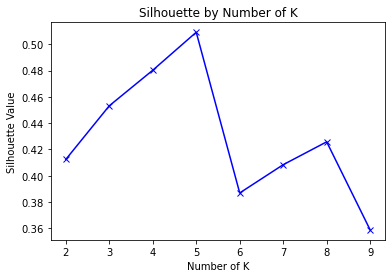

In [88]:
# Call the function
Silhouettes, num_cluseters = get_silhouettes (normalized_df)
print(f"Best K for clustering is {num_cluseters}")
# Call the function
show_silhouettes (Silhouettes)

In [89]:
clusterer, preds = get_clusterer(normalized_df, num_cluseters)

labels: [1 2 3 ... 2 0 0] 

centroids:
0 : [1.00000000e+00 4.44575333e-01 8.07485659e-01 4.52799336e-01
 2.03895865e-01 2.77555756e-17 9.18836141e-03 1.52655666e-16
 3.67534456e-02 2.60208521e-18 4.94946401e-01 5.60183767e-01] 

1 : [1.11022302e-16 4.28580845e-01 6.93782406e-01 3.55336732e-01
 1.87167095e-01 1.66533454e-16 7.71208226e-03 1.38777878e-16
 3.34190231e-02 5.14138817e-03 5.37275064e-01 5.34190231e-01] 

2 : [0.68493151 0.45381103 0.77223125 0.44063927 0.2110137  0.15753425
 0.03424658 1.         0.05479452 0.00684932 0.51506849 0.54383562] 

3 : [ 1.00000000e+00  4.03388278e-01  8.12575666e-01  4.52179177e-01
  2.02000000e-01  1.00000000e+00 -1.73472348e-18  1.38777878e-17
  1.78571429e-02  1.30104261e-18  5.35714286e-01  5.17857143e-01] 

4 : [0.00000000e+00 4.10039113e-01 6.98075266e-01 3.59379489e-01
 1.87932203e-01 1.00000000e+00 1.73472348e-18 1.69491525e-01
 3.38983051e-02 1.69491525e-02 5.45762712e-01 5.18644068e-01] 



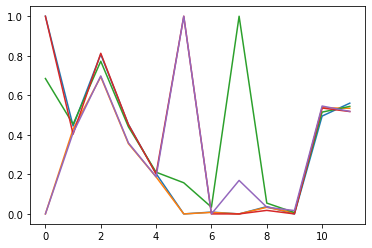

In [90]:
# Define a function that will show the model's results numerically and visually
def show_results (clusterer):
    print('labels:', clusterer.labels_, '\n')
    centers = clusterer.cluster_centers_
    print('centroids:')
    for i in range(num_cluseters):
        print(i, ":", centers[i,:],'\n')
    for i in range(num_cluseters):
        plt.plot(centers[i,:])
        silhouette_score
# Call the function
show_results(clusterer)




In [371]:
df[df['weight_kg' ] == 0] = 20
df[df['weight_kg' ] == 20] 

,patient_id,gender,age,height_cm,weight_kg,bmi,ecg_test_score,ecg_weight,us_test_score,us_weight,...,overall_score,smoking,heart_disease_hist,heart_disease_family_hist,bp_medication,diabetes,work_stress_level,exercise_level,bp_systolic,bp_diastolic
